# Providing data-driven suggestions for HR

Employee turnover is a costly and disruptive issue for any organization. At Salifort Motors, the HR department has collected internal data in hopes of understanding what drives employee departures.

In this project, I will perform exploratory data analysis (EDA) to identify patterns and trends in employee behavior, preprocess the data to handle missing values and prepare features, and train classification models to predict employee attrition. I will also evaluate model performance using appropriate metrics such as precision, recall, F1-score and ROC-AUC to ensure reliable predictions. Finally, I will interpret feature importance to provide data-driven recommendations that the HR team can act on.

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

In [1]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [2]:
# Load dataset into a dataframe
df = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Data Exploration (data cleaning)

In [3]:
# Gather basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
# Gather descriptive statistics about the data
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
# Display all column names
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df.rename(columns = {'Work_accident': 'work_accident', 'Department': 'department'}, inplace=True)

# Display all column names after the update
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
# Check for missing values
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [8]:
# Check for duplicates
df.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed
duplicates = df[df.duplicated()]
duplicates.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
data = df.drop_duplicates().reset_index(drop=True)

In [11]:
data.duplicated().sum()

0

In [12]:
sns.set_theme(style="darkgrid")

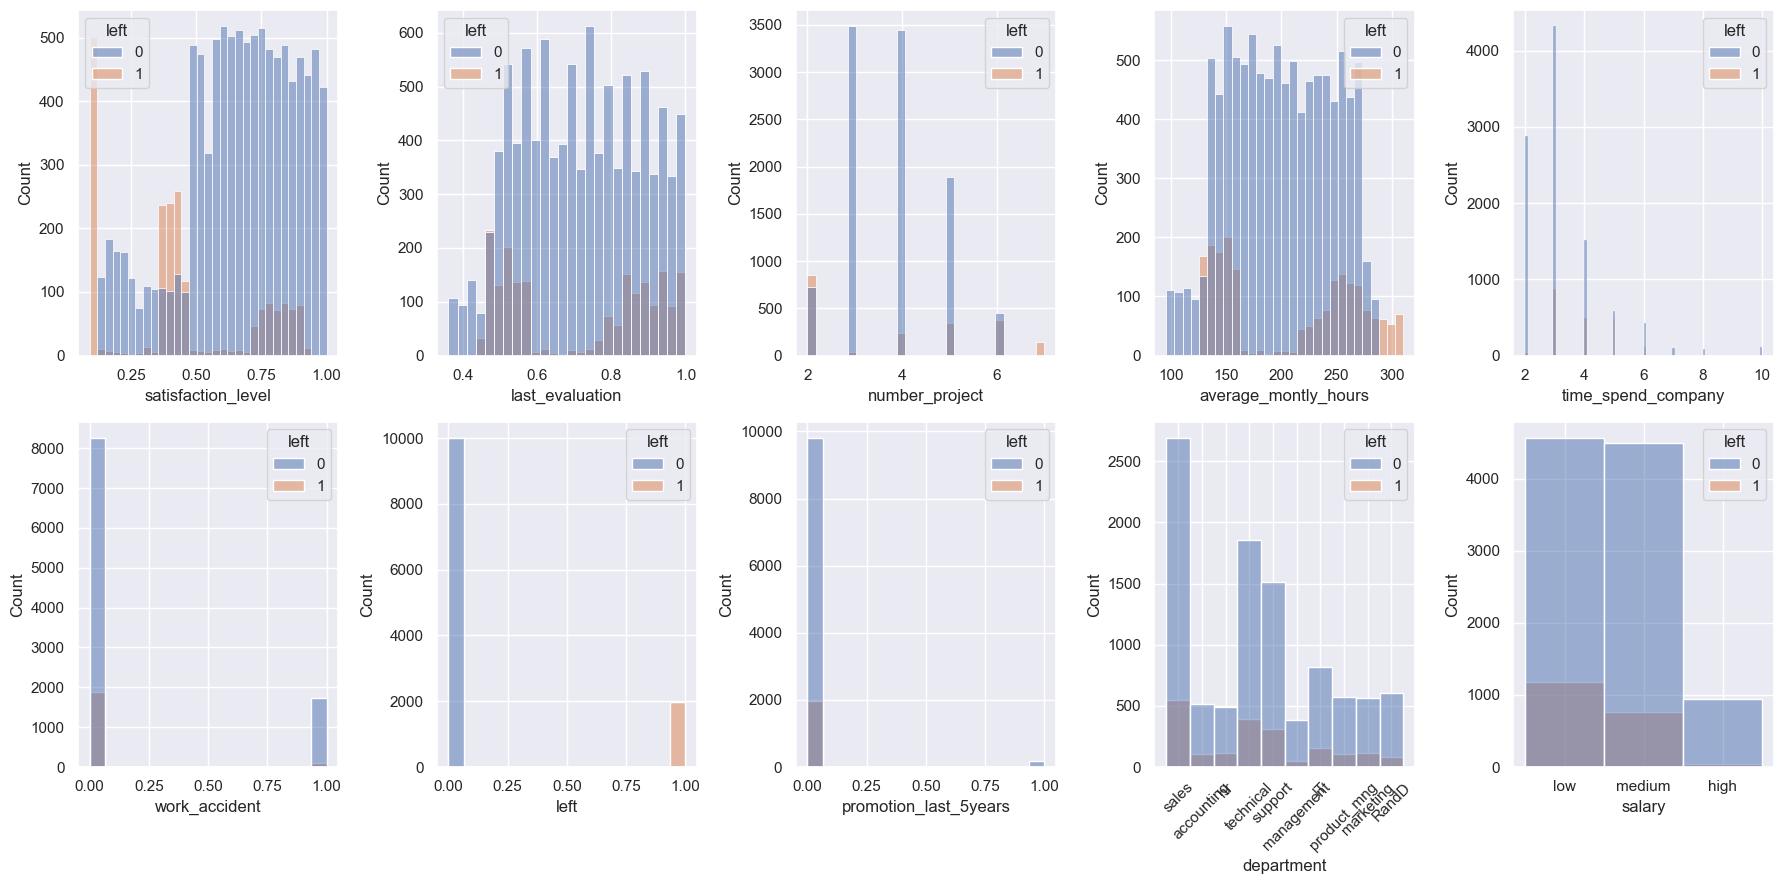

In [13]:
# Quick look at the data distributions
fig, axes = plt.subplots(2,5, figsize = (18,9))
axes = axes.flatten()

for i, col in enumerate (data.columns):
    sns.histplot(data= data, x= col, ax =axes[i], hue= 'left')
    
    if col == 'department':  # Adjust ticks only for 'department' column
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()

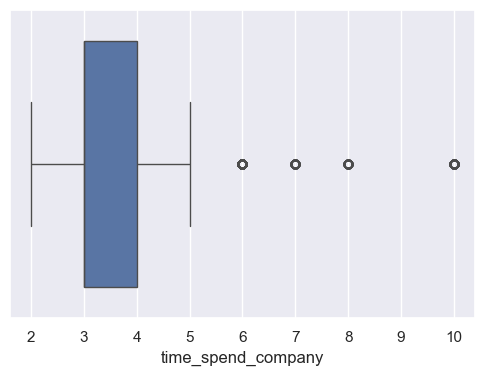

In [14]:
# Create a boxplot to visualize distribution of `time_spend_company` and detect any outliers
plt.figure(figsize=(6,4))
sns.boxplot(data = data, x = 'time_spend_company');

In [15]:
# Determine the number of rows containing outliers
Q1 = data['time_spend_company'].quantile(0.25)
Q3 = data['time_spend_company'].quantile(0.75)
IQR = Q3 - Q1

# Boolean mask of outliers (outside 1.5*IQR range)
outliers = ((data['time_spend_company'] < (Q1 - 1.5 * IQR)) | (data['time_spend_company'] > (Q3 + 1.5 * IQR)))

# Count total outliers per column
outlier_counts = outliers.sum()
print(outlier_counts)

824


## Data Visualizations

In [16]:
data['average_montly_hours'].describe()

count    11991.000000
mean       200.473522
std         48.727813
min         96.000000
25%        157.000000
50%        200.000000
75%        243.000000
max        310.000000
Name: average_montly_hours, dtype: float64

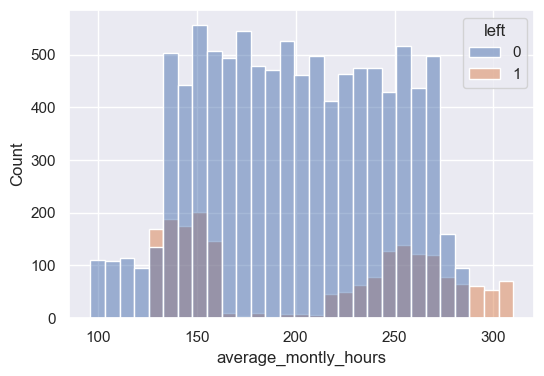

In [17]:
plt.figure(figsize= (6,4))
sns.histplot(data = data, x = 'average_montly_hours', hue = 'left');

If someone works 45 hours per week, the expected monthly hours per person would be 45 × 4 = 180 hours. However, the overall average for workers in the company appears to be around 200 hours. From the plot, we can see that most of the employees who left the company were either working more than 200 hours or less than the full-time standard and the company average.

In [18]:
def categorize_hours(hours):
    if hours < 160:
        return 'underworked'
    elif hours > 200:
        return 'overworked'
    else:
        return 'balanced'

# Apply the function to create the new feature
data['work_balance'] = data['average_montly_hours'].apply(categorize_hours)

# Add dummy variables directly to the dataframe
data = pd.get_dummies(data, columns=['work_balance'], prefix='work', drop_first=True)

In [19]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary,work_overworked,work_underworked
0,0.38,0.53,2,157,3,0,1,0,sales,low,False,True
1,0.80,0.86,5,262,6,0,1,0,sales,medium,True,False
2,0.11,0.88,7,272,4,0,1,0,sales,medium,True,False
3,0.72,0.87,5,223,5,0,1,0,sales,low,True,False
4,0.37,0.52,2,159,3,0,1,0,sales,low,False,True


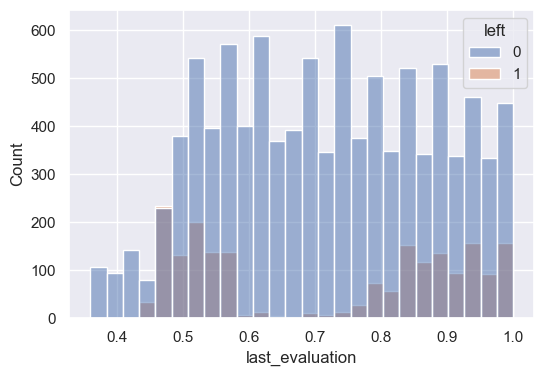

In [20]:
plt.figure(figsize= (6,4))
sns.histplot(data = data, x = 'last_evaluation', hue = 'left');

There's one concentration of departures around the 0.5 evaluation score range and there's another concentration of departures at the very high evaluation scores. There are fewer departures in the middle evaluation ranges

This could suggest people might be leaving either when they receive low-to-medium evaluations (possibly due to dissatisfaction or performance concerns) or when they receive very high evaluations (possibly being poached by other companies or having better opportunities elsewhere).

In [21]:
# Bin 'last_evaluation' scores into 3 categories: low, medium, high - (1,2,3)
data['evaluation_category'] = pd.cut(
    data['last_evaluation'], 
    bins=[0, 0.55, 0.75, 1.0], 
    labels=[1, 2, 3],
    include_lowest=True
)

evaluation_category
1    0.271888
2    0.048034
3    0.201671
Name: left, dtype: float64



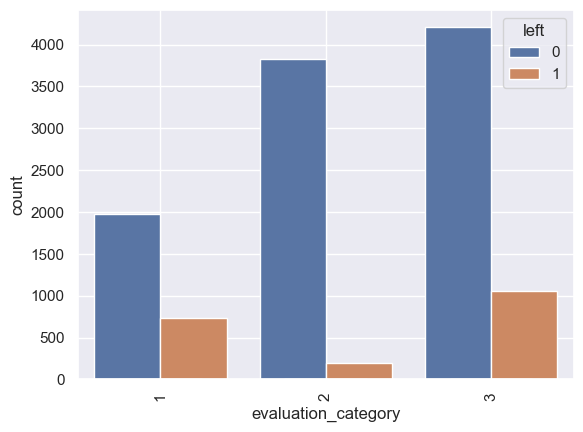

In [22]:
sns.countplot(x='evaluation_category', hue='left', data=data)

# Percentage of employees who left by category
print(data.groupby('evaluation_category', observed ='False')['left'].mean())
print()
data.groupby('evaluation_category', observed ='False')['left'].mean().plot(kind='bar');

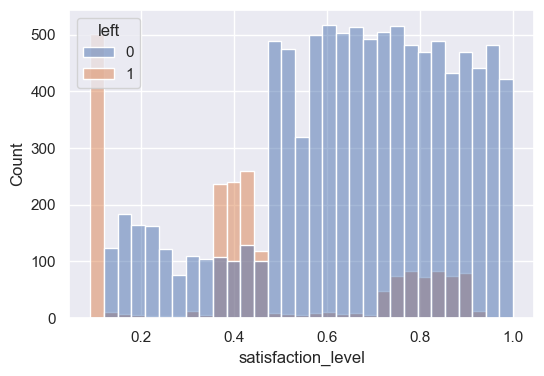

In [23]:
plt.figure(figsize= (6,4))
sns.histplot(data = data, x = 'satisfaction_level', hue = 'left');

The data shows a clear relationship between low satisfaction levels and employee departures, with a strong signal that employees with satisfaction below 0.5 are much more likely to leave. However, the unusually sharp distribution pattern suggests we should be cautious about making definitive conclusions. While satisfaction appears to be a strong predictor of turnover, the data doesn't necessarily reveal the complete causal story or underlying reasons for departures. 

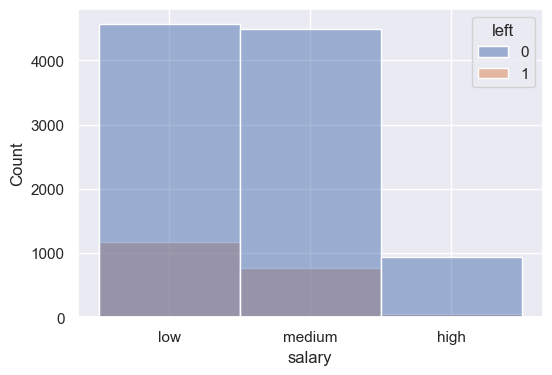

In [24]:
plt.figure(figsize= (6,4))
sns.histplot(data = data, x = 'salary', hue = 'left');

In [25]:
print(data.groupby('salary', observed ='False')['left'].mean())

salary
high      0.048485
low       0.204530
medium    0.146170
Name: left, dtype: float64


The majority of employees fall into the low and medium salary categories, with significantly fewer high-salary employees. The proportion of employees who left is lowest in the high-salary group (4.8%), higher in the medium group (14.6%), and highest in the low-salary group (20.5%).

In [26]:
# Mapping salary categories to ordinal values (low=1, medium=2, high=3)
salary_mapping = {'low': 1, 'medium': 2, 'high': 3}
data['salary'] = data['salary'].map(salary_mapping)

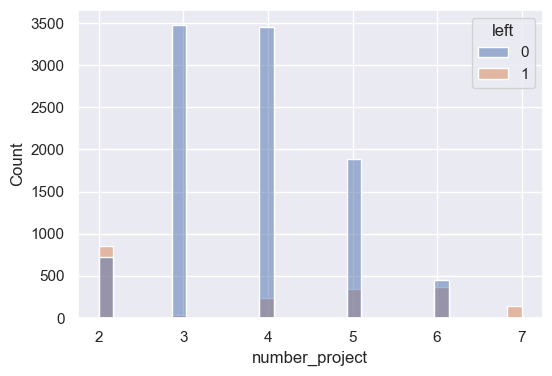

In [27]:
plt.figure(figsize= (6,4))
sns.histplot(data = data, x = 'number_project', hue = 'left');

The data reveals a non-linear relationship: employees handling either too few (e.g., 2) or too many projects (6–7) tend to leave the company more often, whereas those managing 3–4 projects show the lowest turnover rates, suggesting this range may be the optimal workload.

In [28]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary,work_overworked,work_underworked,evaluation_category
0,0.38,0.53,2,157,3,0,1,0,sales,1,False,True,1
1,0.80,0.86,5,262,6,0,1,0,sales,2,True,False,3
2,0.11,0.88,7,272,4,0,1,0,sales,2,True,False,3
3,0.72,0.87,5,223,5,0,1,0,sales,1,True,False,3
4,0.37,0.52,2,159,3,0,1,0,sales,1,False,True,1


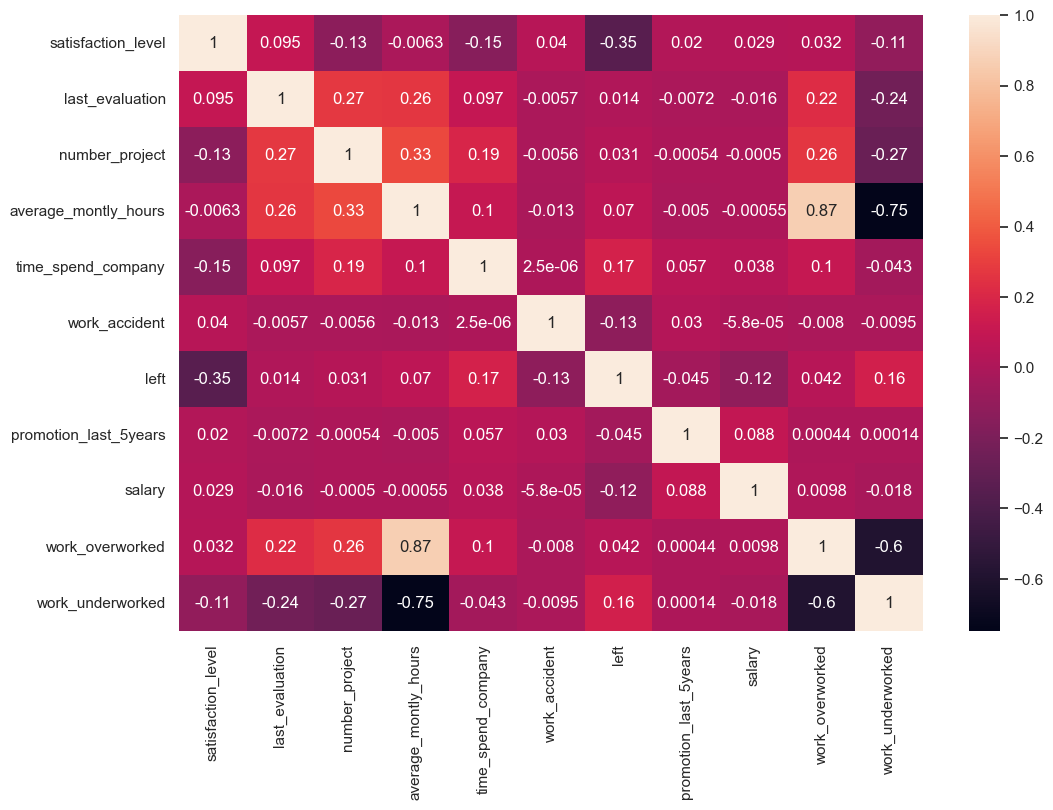

In [29]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(numeric_only = True), annot = True);

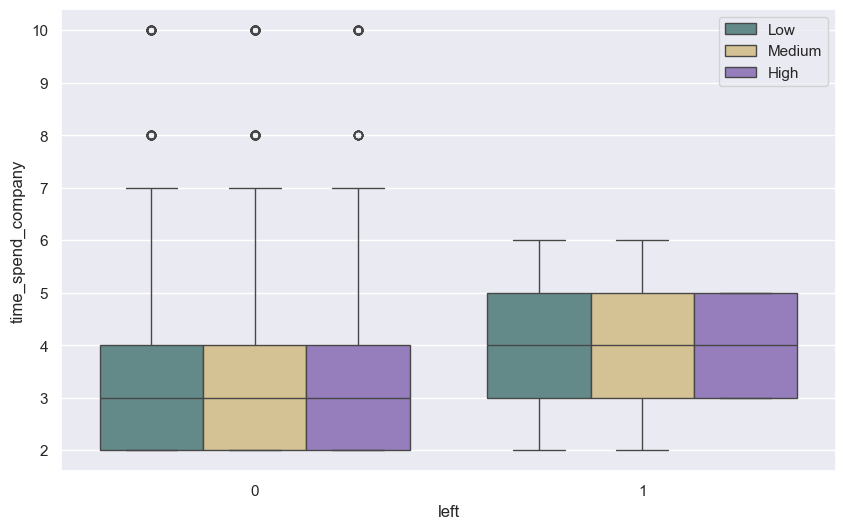

In [30]:
palette = {1: "#5e8f8f", 2: "#dec78a", 3: "#9373c7"}

plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=data, x='left', y='time_spend_company', hue='salary', palette=palette)

# Add proper labels for the salary values
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Low', 'Medium', 'High']);

This visualization contradicts the common assumption that newer employees are most likely to leave. Instead, it suggests retention strategies might need to focus on employees in their middle tenure years

In [31]:
data['department'].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

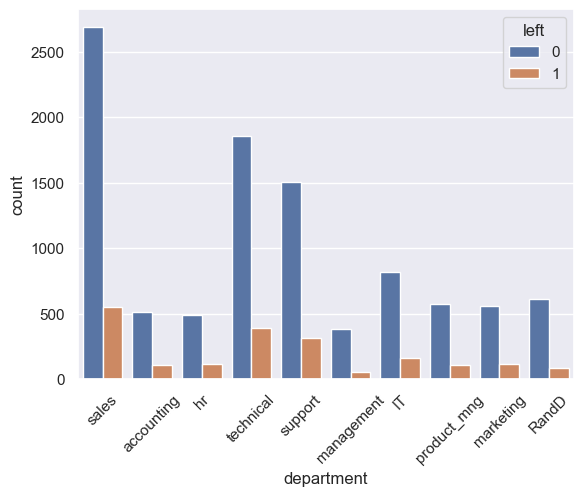

In [32]:
sns.countplot(data=data, x = 'department', hue = 'left')
plt.xticks(rotation = 45);

In [33]:
departure_rates = data.groupby('department')['left'].mean().sort_values(ascending=False)
departure_rates

department
hr             0.188020
accounting     0.175523
technical      0.173797
support        0.171334
sales          0.169805
marketing      0.166419
IT             0.161885
product_mng    0.160350
RandD          0.122478
management     0.119266
Name: left, dtype: float64

In [34]:
# Creating dummy variables for department
data1 = pd.get_dummies(data, columns=['department'], prefix=['dept'], drop_first=True).astype(int)
data1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,work_overworked,...,evaluation_category,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0,0,2,157,3,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
1,0,0,5,262,6,0,1,0,2,1,...,3,0,0,0,0,0,0,1,0,0
2,0,0,7,272,4,0,1,0,2,1,...,3,0,0,0,0,0,0,1,0,0
3,0,0,5,223,5,0,1,0,1,1,...,3,0,0,0,0,0,0,1,0,0
4,0,0,2,159,3,0,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0


In [35]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   satisfaction_level     11991 non-null  int32
 1   last_evaluation        11991 non-null  int32
 2   number_project         11991 non-null  int32
 3   average_montly_hours   11991 non-null  int32
 4   time_spend_company     11991 non-null  int32
 5   work_accident          11991 non-null  int32
 6   left                   11991 non-null  int32
 7   promotion_last_5years  11991 non-null  int32
 8   salary                 11991 non-null  int32
 9   work_overworked        11991 non-null  int32
 10  work_underworked       11991 non-null  int32
 11  evaluation_category    11991 non-null  int32
 12  dept_RandD             11991 non-null  int32
 13  dept_accounting        11991 non-null  int32
 14  dept_hr                11991 non-null  int32
 15  dept_management        11991 non-nul

In [36]:
dept_columns = ['dept_RandD', 'dept_accounting', 'dept_hr', 'dept_management', 
                'dept_marketing', 'dept_product_mng', 'dept_sales', 
                'dept_support', 'dept_technical']

data1.corr()['left'][dept_columns]

dept_RandD         -0.029016
dept_accounting     0.005955
dept_hr             0.013567
dept_management    -0.024417
dept_marketing      0.000248
dept_product_mng   -0.003768
dept_sales          0.006154
dept_support        0.006019
dept_technical      0.010000
Name: left, dtype: float64

Department variables show near-zero correlations with employee departures (all below ±0.03), indicating department membership has minimal predictive value for turnover. 

In [37]:
# Get numbers of people who left vs. stayed
print(data['left'].value_counts())
print()
# Get percentages of people who left vs. stayed
print(data['left'].value_counts(normalize=True))


left
0    10000
1     1991
Name: count, dtype: int64

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


In [38]:
data1['salary'].value_counts()

salary
1    5740
2    5261
3     990
Name: count, dtype: int64

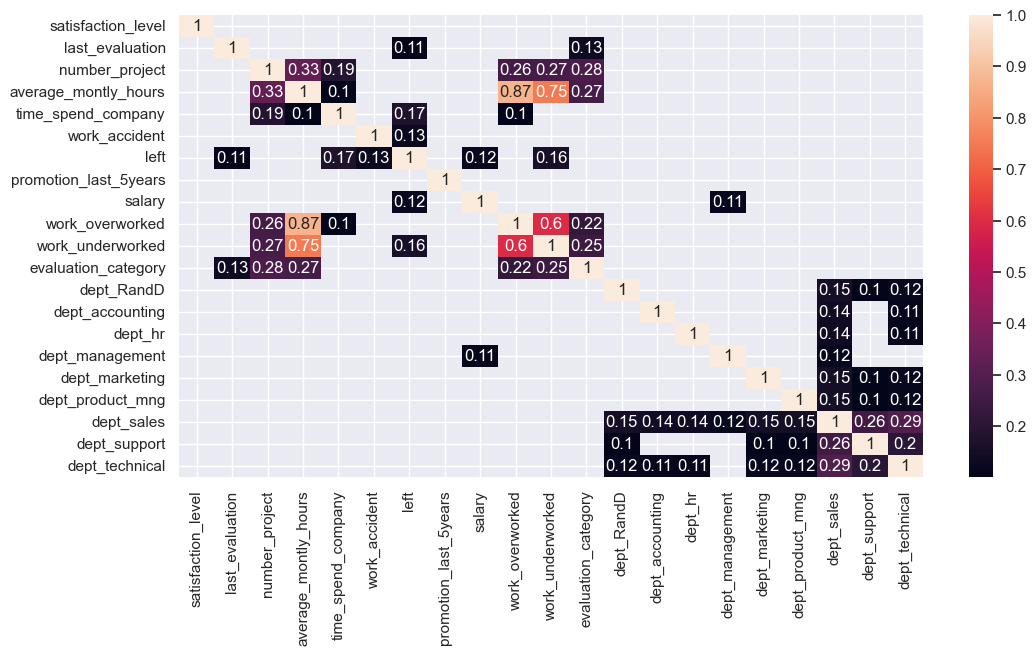

In [39]:
correlation = abs(data1.corr())

plt.figure(figsize=(12,6))
sns.heatmap(correlation[correlation > 0.10], annot=True)
plt.show()

## Model Building, Results and Evaluation

### Logistic Regression Model

In [40]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   satisfaction_level     11991 non-null  int32
 1   last_evaluation        11991 non-null  int32
 2   number_project         11991 non-null  int32
 3   average_montly_hours   11991 non-null  int32
 4   time_spend_company     11991 non-null  int32
 5   work_accident          11991 non-null  int32
 6   left                   11991 non-null  int32
 7   promotion_last_5years  11991 non-null  int32
 8   salary                 11991 non-null  int32
 9   work_overworked        11991 non-null  int32
 10  work_underworked       11991 non-null  int32
 11  evaluation_category    11991 non-null  int32
 12  dept_RandD             11991 non-null  int32
 13  dept_accounting        11991 non-null  int32
 14  dept_hr                11991 non-null  int32
 15  dept_management        11991 non-nul

In [41]:
data1.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'salary', 'work_overworked',
       'work_underworked', 'evaluation_category', 'dept_RandD',
       'dept_accounting', 'dept_hr', 'dept_management', 'dept_marketing',
       'dept_product_mng', 'dept_sales', 'dept_support', 'dept_technical'],
      dtype='object')

In [42]:
data1 = data1[['satisfaction_level', 'number_project', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'salary', 'work_overworked',
       'work_underworked', 'evaluation_category', 'dept_RandD',
       'dept_accounting', 'dept_hr', 'dept_management', 'dept_marketing',
       'dept_product_mng', 'dept_sales', 'dept_support', 'dept_technical']]

In [43]:
X = data1.drop('left', axis = 1)
y = data1['left']

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 13, stratify = y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)     # Fit only on training
X_test_scaled = scaler.transform(X_test) 


log_model =  LogisticRegression(class_weight='balanced', max_iter=200, random_state=10)

In [44]:
log_model.fit(X_train_scaled, y_train)
print(log_model)

LogisticRegression(class_weight='balanced', max_iter=200, random_state=10)


In [45]:
y_pred = log_model.predict(X_test_scaled)

In [46]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80      2001
           1       0.36      0.88      0.51       398

    accuracy                           0.72      2399
   macro avg       0.66      0.78      0.66      2399
weighted avg       0.87      0.72      0.75      2399



Overall accuracy of 72% sounds decent but is misleading given the class imbalance (2001 stayed vs. 398 left). Accuracy is dominated by the majority class (stayed).

The model favors recall over precision for the "Leaving" class. It catches most leavers but at the cost of many false alarms.

The low precision on "Leaving" means the company risks wasting resources trying to retain people who weren’t actually planning to leave.

F1-score of 0.51 for "Leaving" confirms the performance is mediocre and leaves room for improvement.

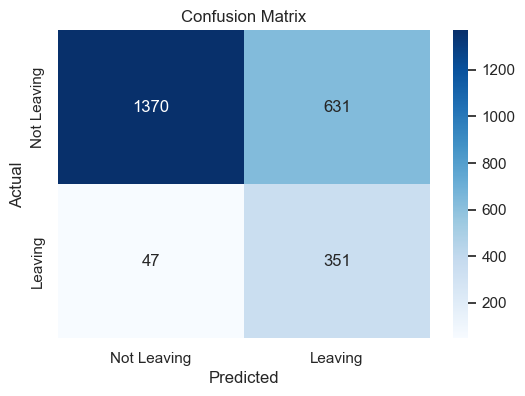

In [47]:
cm = confusion_matrix(y_test, y_pred)

# Create plot
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Leaving', 'Leaving'],
            yticklabels=['Not Leaving', 'Leaving'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted');

#### Model Interpretation

The model is useful for flagging potential leavers but not reliable enough to act on every prediction without further validation or refinement. If the cost of false positives is high, we need to improve precision. If missing leavers is riskier, this tradeoff might be acceptable but it’s still not ideal.

### Decision Tree Model

In [48]:
X = data1.drop('left', axis=1)
y = data1['left']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=13, stratify=y)

# Define a pipeline with scaler + model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeClassifier(class_weight='balanced', random_state=10))
])

# Hyperparameter grid 
cv_params = {
    'tree__max_depth': [6, 8, None],
    'tree__min_samples_leaf': [2, 4, 6],
    'tree__min_samples_split': [2, 4, 6]
}

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=cv_params,
    scoring=scoring,
    cv=5,
    refit='roc_auc'
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('tree',
                                        DecisionTreeClassifier(class_weight='balanced',
                                                               random_state=10))]),
             param_grid={'tree__max_depth': [6, 8, None],
                         'tree__min_samples_leaf': [2, 4, 6],
                         'tree__min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [49]:
%%time
grid_search.fit(X_train, y_train)
print(grid_search)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('tree',
                                        DecisionTreeClassifier(class_weight='balanced',
                                                               random_state=10))]),
             param_grid={'tree__max_depth': [6, 8, None],
                         'tree__min_samples_leaf': [2, 4, 6],
                         'tree__min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])
CPU times: total: 4.11 s
Wall time: 4.1 s


In [50]:
# Evaluate on test set (unseen during training and CV)
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print(f"Test accuracy: {test_score:.4f}")

Test accuracy: 0.9412


In [51]:
y_pred = grid_search.predict(X_test)

Confusion Matrix:


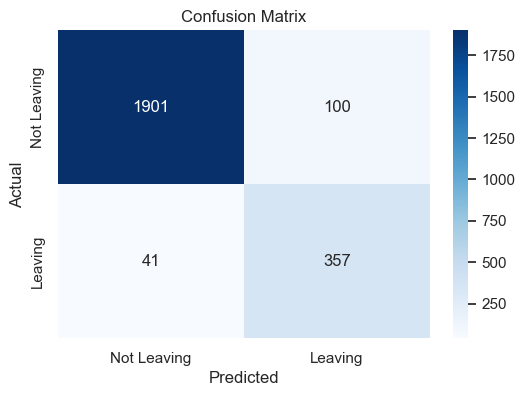

In [52]:
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Leaving', 'Leaving'],
            yticklabels=['Not Leaving', 'Leaving'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### Model Performance

This model maintains similar performance in identifying people who are leaving (sensitivity) while dramatically reducing false alarms compared to the logistic regression model. 

In [53]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      2001
           1       0.78      0.90      0.84       398

    accuracy                           0.94      2399
   macro avg       0.88      0.92      0.90      2399
weighted avg       0.95      0.94      0.94      2399



In [54]:
best_tree = grid_search.best_estimator_.named_steps['tree']

# Now get feature importances
importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_tree.feature_importances_
})

print("Feature Importances:")
print(importances.sort_values('importance', ascending=False))

Feature Importances:
                  feature  importance
2      time_spend_company    0.425353
1          number_project    0.254856
8     evaluation_category    0.165066
6         work_overworked    0.084483
7        work_underworked    0.051959
5                  salary    0.004382
17         dept_technical    0.004021
3           work_accident    0.003558
15             dept_sales    0.003388
16           dept_support    0.001065
9              dept_RandD    0.000916
10        dept_accounting    0.000572
11                dept_hr    0.000382
12        dept_management    0.000000
13         dept_marketing    0.000000
14       dept_product_mng    0.000000
4   promotion_last_5years    0.000000
0      satisfaction_level    0.000000


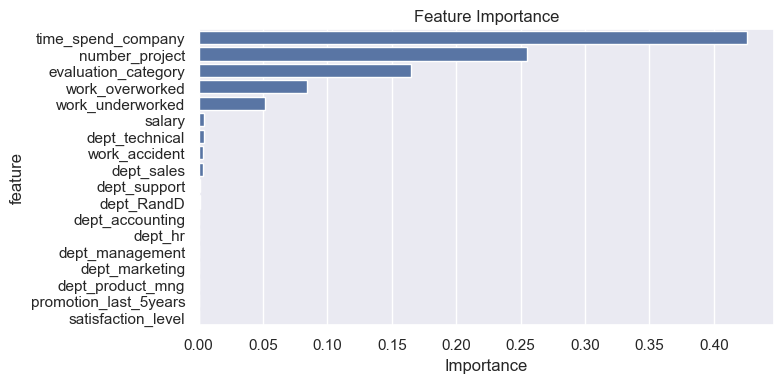

In [55]:
importances = importances.sort_values('importance', ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x='importance', y='feature', data=importances)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

In [56]:
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Average CV score:", cv_scores.mean())

Cross-validation scores: [0.94111516 0.94215737 0.94369135 0.94629823 0.95099062]
Average CV score: 0.944850545095122


### Random Forest Model

In [57]:
X = data1.drop('left', axis = 1)
y = data1['left']


X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 13, stratify = y)


rf = RandomForestClassifier(class_weight='balanced', random_state=0)


cv_params = {# 'max_features': [1.0],
             'n_estimators': [100, 200, 300], 
             'max_depth': [2, 6, None],
             'min_samples_leaf': [1, 2, 3],
             'min_samples_split': [2, 4, 6],
             }  


scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']


random_f = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='roc_auc')

In [58]:
%%time
random_f.fit(X_train, y_train)

CPU times: total: 4min 53s
Wall time: 4min 54s


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=0),
             param_grid={'max_depth': [2, 6, None],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 200, 300]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [59]:
print("Best parameters:", random_f.best_params_)
print("Best cross-validation score:", random_f.best_score_)

Best parameters: {'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation score: 0.9672852941343333


In [60]:
rf_pred = random_f.predict(X_test)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2001
           1       0.85      0.89      0.87       398

    accuracy                           0.95      2399
   macro avg       0.91      0.93      0.92      2399
weighted avg       0.96      0.95      0.96      2399

Confusion Matrix:


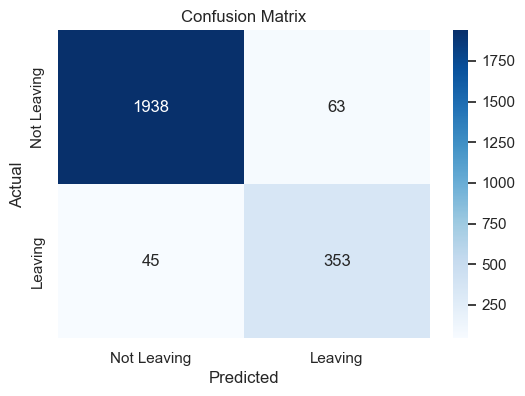

In [61]:
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Leaving', 'Leaving'],
            yticklabels=['Not Leaving', 'Leaving'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Precision 0.85 and recall 0.89 is strong. You catch 89% of actual leavers and when the model says someone will leave, it’s right 85% of the time.

We have a reliable model that flags most employees likely to leave, with relatively low false positives.

This balance should make retention efforts efficient — fewer wasted resources chasing false alarms.

It’s a noticeable improvement over earlier models with poor precision or recall on the leaving class.

In [62]:
importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': random_f.best_estimator_.feature_importances_  # Access through best_estimator_
})
print("Feature Importances:")
print(importances.sort_values('importance', ascending=False))

Feature Importances:
                  feature  importance
2      time_spend_company    0.325718
1          number_project    0.319048
8     evaluation_category    0.146385
6         work_overworked    0.086822
7        work_underworked    0.052532
5                  salary    0.020847
3           work_accident    0.018245
15             dept_sales    0.005167
17         dept_technical    0.004984
16           dept_support    0.004660
11                dept_hr    0.002719
9              dept_RandD    0.002376
10        dept_accounting    0.002000
4   promotion_last_5years    0.001996
14       dept_product_mng    0.001958
12        dept_management    0.001739
13         dept_marketing    0.001420
0      satisfaction_level    0.001386


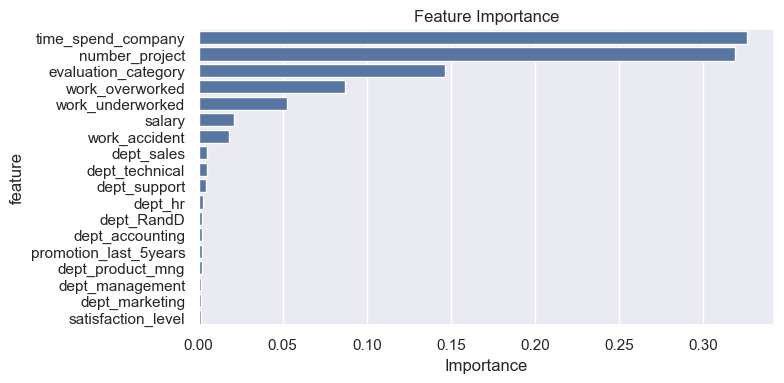

In [63]:
importances = importances.sort_values('importance', ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x='importance', y='feature', data=importances)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

In [64]:
y_proba = random_f.predict_proba(X_test)[:,1]

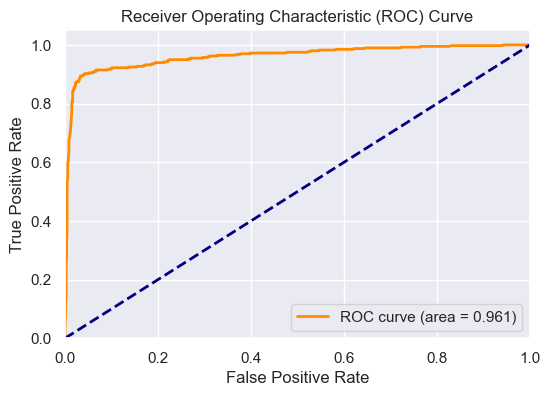

In [65]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

With an AUC of 0.961, the model demonstrates strong discriminatory power to accurately flag employees likely to leave. This gives HR confidence to prioritize outreach effectively.

High recall for the “Leaving” class means the model captures most potential leavers, enabling targeted retention efforts that maximize the return on invesment of limited HR resources.

Employees with high workload or many projects and longer tenure are more at risk.

Both overworked (8.7%) and underworked (5.3%) contribute meaningfully.

### Actionable Recommendations

Initiate early conversations, professional development, and incentive programs with flagged employees to reduce turnover risk.
Leverage model insights to identify systemic issues(such as workload imbalance,or limited growth paths) and address them organizationally.